# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data Import 

In [2]:
train = pd.read_csv('../data/train.csv')

/usr/lib/python2.7/dist-packages/pandas/io/parsers.py:1150: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [3]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


## Trim off the zero sales

In [4]:
non_zero_sales_mask = train['Sales'] > 0

nz_train = train.ix[non_zero_sales_mask, :]
nz_train.ix[:, 'LogSales'] = np.log(nz_train['Sales'])

/usr/lib/python2.7/dist-packages/pandas/core/indexing.py:245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = np.nan
/usr/lib/python2.7/dist-packages/pandas/core/indexing.py:415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [5]:
nz_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,LogSales
0,1,5,2015-07-31,5263,555,1,1,0,1,8.568456
1,2,5,2015-07-31,6064,625,1,1,0,1,8.710125
2,3,5,2015-07-31,8314,821,1,1,0,1,9.025696
3,4,5,2015-07-31,13995,1498,1,1,0,1,9.546455
4,5,5,2015-07-31,4822,559,1,1,0,1,8.480944


In [6]:
for x in ['Open', 'Promo', 'StateHoliday', 'SchoolHoliday']:
    print x, "=", np.unique(nz_train[x])

Open = [1]
Promo = [0 1]
StateHoliday = ['0' '0' 'a' 'b' 'c']
SchoolHoliday = [0 1]


In [7]:
print(len(train), len(nz_train))

(1017209, 844338)


### Log Transforming Sales

Populating the interactive namespace from numpy and matplotlib


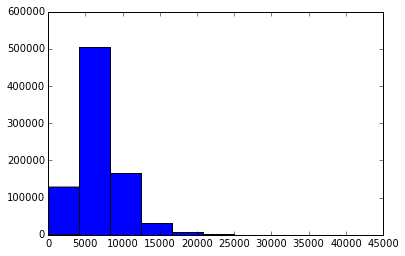

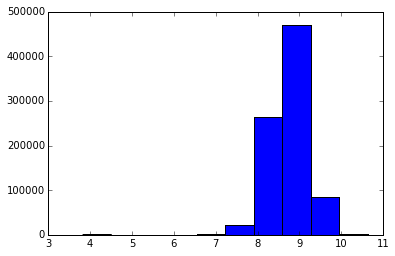

In [8]:

%pylab inline
_, _, _ = plt.hist(nz_train.ix[non_zero_sales_mask, 'Sales'])


plt.figure()
_, _, _ = plt.hist(nz_train.ix[non_zero_sales_mask, 'LogSales'])


## Add Weeknumber (most predictive date field)

In [9]:
import datetime as dt

nz_train['WeekNumber'] = nz_train['Date'].apply(lambda x: pd.to_datetime(x).isocalendar()[1])

/home/jdickerson/.local/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


## Encode State Holiday

In [10]:
from sklearn.preprocessing import LabelEncoder
nz_train.ix[:, ['StateHoliday']] = nz_train.ix[:, ['StateHoliday']].astype(str)

le = LabelEncoder().fit(np.unique(nz_train['StateHoliday']))

nz_train.ix[:, 'StateHolidayTransform'] = le.transform(nz_train.ix[:, 'StateHoliday'])

In [11]:
nz_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,LogSales,WeekNumber,StateHolidayTransform
0,1,5,2015-07-31,5263,555,1,1,0,1,8.568456,31,0
1,2,5,2015-07-31,6064,625,1,1,0,1,8.710125,31,0
2,3,5,2015-07-31,8314,821,1,1,0,1,9.025696,31,0
3,4,5,2015-07-31,13995,1498,1,1,0,1,9.546455,31,0
4,5,5,2015-07-31,4822,559,1,1,0,1,8.480944,31,0


In [12]:
np.unique(nz_train['StateHolidayTransform'])

array([0, 1, 2, 3])

## Encode the Store Data

In [13]:
store = pd.read_csv('../data/store.csv')

In [14]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270,9,2008,0,NaN,NaN,NaN
1,2,a,a,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,a,a,14130,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,c,c,620,9,2009,0,NaN,NaN,NaN
4,5,a,a,29910,4,2015,0,NaN,NaN,NaN


In [15]:
store.ix[:, 'StoreTypeTransformed'] = LabelEncoder().fit_transform(store['StoreType'])

In [16]:
store.ix[:, 'AssortmentTransformed'] = LabelEncoder().fit_transform(store['Assortment'])

## Attempt to Join

In [17]:
joined = nz_train.merge(store, how='inner')

In [18]:
joined.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,LogSales,WeekNumber,StateHolidayTransform,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,StoreTypeTransformed,AssortmentTransformed
count,844338.000000,844338.000000,844338.000000,844338.000000,844338,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,842152.000000,575738.000000,575738.000000,844338.000000,421046.000000,421046.000000,844338.000000,844338.000000
mean,558.421374,3.520350,6955.959134,762.777166,1,0.446356,0.193578,8.757564,23.646946,0.001418,5458.156627,7.224842,2008.697753,0.498670,23.254177,2011.753929,1.205441,0.936493
std,321.730861,1.723712,3103.815515,401.194153,0,0.497114,0.395102,0.425278,14.389931,0.047578,7809.573181,3.210118,5.978064,0.499999,14.100647,1.660946,1.363375,0.993099
min,1.000000,1.000000,46.000000,8.000000,1,0.000000,0.000000,3.828641,1.000000,0.000000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,1,0.000000,0.000000,8.488588,11.000000,0.000000,710.000000,4.000000,2006.000000,0.000000,13.000000,2011.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,1,0.000000,0.000000,8.759198,23.000000,0.000000,2320.000000,8.000000,2010.000000,0.000000,22.000000,2012.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1,1.000000,0.000000,9.031214,35.000000,0.000000,6890.000000,10.000000,2013.000000,1.000000,37.000000,2013.000000,3.000000,2.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1,1.000000,1.000000,10.634677,52.000000,3.000000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000,3.000000,2.000000


## OneHotEconder

In [19]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder().fit(joined.ix[:, ['Promo',
                                        'StateHolidayTransform', 
                                        'SchoolHoliday',
                                        'StoreTypeTransformed',
                                        'AssortmentTransformed']])

categoricals= enc.transform(joined.ix[:, ['Promo',
                                          'StateHolidayTransform', 
                                          'SchoolHoliday',
                                          'StoreTypeTransformed',
                                          'AssortmentTransformed']]).toarray().astype(float64)

training_df = pd.DataFrame(categoricals)
training_df['LogSales'] = joined['LogSales']
training_df['DayOfWeek'] = joined['DayOfWeek']
training_df['Store'] = joined['Store']
training_df['WeekNumber'] = joined['WeekNumber']

In [20]:
training_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,LogSales,DayOfWeek,Store,WeekNumber
count,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000
mean,0.553644,0.446356,0.998922,0.000822,0.000172,0.000084,0.806422,0.193578,0.541302,0.018429,0.133795,0.306474,0.526892,0.009722,0.463386,8.757564,3.520350,558.421374,23.646946
std,0.497114,0.497114,0.032812,0.028658,0.013104,0.009170,0.395102,0.395102,0.498292,0.134496,0.340432,0.461029,0.499277,0.098122,0.498658,0.425278,1.723712,321.730861,14.389931
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.828641,1.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.488588,2.000000,280.000000,11.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,8.759198,3.000000,558.000000,23.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,9.031214,5.000000,837.000000,35.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.634677,7.000000,1115.000000,52.000000


In [21]:
# training_df = joined.ix[:, ['Promo',
#                             'Promo2',
#                             'StateHolidayTransform', 
#                             'SchoolHoliday',
#                             'StoreTypeTransformed',
#                             'AssortmentTransformed',
#                             'LogSales',
#                             'DayOfWeek',
#                             'Store',
#                             'WeekNumber']]

training_df.to_csv('../cleaneddata/cleanedTraining.csv')

## Make Evaluation Set

In [22]:
test = pd.read_csv('../data/test.csv')

In [23]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1,1,0,0
1,2,3,4,2015-09-17,1,1,0,0
2,3,7,4,2015-09-17,1,1,0,0
3,4,8,4,2015-09-17,1,1,0,0
4,5,9,4,2015-09-17,1,1,0,0


## Fix the unknown opens

In [24]:
test.ix[test['Open'] != 0, 'Open'] = 1

In [25]:
test.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday
count,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000
mean,20544.500000,555.899533,3.979167,0.854361,0.395833,0.443487
std,11861.228267,320.274496,2.015481,0.352748,0.489035,0.496802
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000


In [26]:
test['WeekNumber'] = test['Date'].apply(lambda x: pd.to_datetime(x).isocalendar()[1])
test.ix[:, ['StateHoliday']] = test.ix[:, ['StateHoliday']].astype(str)

test.ix[:, 'StateHolidayTransform'] = LabelEncoder().fit_transform(test['StateHoliday'])



In [27]:
joined_test = test.merge(store, how='inner')
joined_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,WeekNumber,StateHolidayTransform,...,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,StoreTypeTransformed,AssortmentTransformed
0,1,1,4,2015-09-17,1,1,0,0,38,0,...,a,1270,9,2008,0,NaN,NaN,NaN,2,0
1,857,1,3,2015-09-16,1,1,0,0,38,0,...,a,1270,9,2008,0,NaN,NaN,NaN,2,0
2,1713,1,2,2015-09-15,1,1,0,0,38,0,...,a,1270,9,2008,0,NaN,NaN,NaN,2,0
3,2569,1,1,2015-09-14,1,1,0,0,38,0,...,a,1270,9,2008,0,NaN,NaN,NaN,2,0
4,3425,1,7,2015-09-13,0,0,0,0,37,0,...,a,1270,9,2008,0,NaN,NaN,NaN,2,0


In [28]:
categoricals = enc.transform(joined_test.ix[:, ['Promo',
                                                'StateHolidayTransform', 
                                                'SchoolHoliday',
                                                'StoreTypeTransformed',
                                                'AssortmentTransformed']]).toarray().astype(float64)
testing_df = pd.DataFrame(categoricals)
testing_df['DayOfWeek'] = joined_test['DayOfWeek']
testing_df['Store'] = joined_test['Store']
testing_df['WeekNumber'] = joined_test['WeekNumber']
testing_df['Open'] = joined_test['Open']
testing_df['Id'] = joined_test['Id']

In [29]:
testing_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,DayOfWeek,Store,WeekNumber,Open,Id
count,41088.000000,41088.000000,41088.000000,41088.000000,41088,41088,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000
mean,0.604167,0.395833,0.995619,0.004381,0,0,0.556513,0.443487,0.538551,0.014019,0.103972,0.343458,0.494159,0.010514,0.495327,3.979167,555.899533,34.645833,0.854361,20544.500000
std,0.489035,0.489035,0.066044,0.066044,0,0,0.496802,0.496802,0.498518,0.117569,0.305228,0.474868,0.499972,0.101999,0.499984,2.015481,320.274496,2.015481,0.352748,11861.228267
min,0.000000,0.000000,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,31.000000,0.000000,1.000000
25%,0.000000,0.000000,1.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,279.750000,33.000000,1.000000,10272.750000
50%,1.000000,0.000000,1.000000,0.000000,0,0,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,553.500000,35.000000,1.000000,20544.500000
75%,1.000000,1.000000,1.000000,0.000000,0,0,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,6.000000,832.250000,36.000000,1.000000,30816.250000
max,1.000000,1.000000,1.000000,1.000000,0,0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,1115.000000,38.000000,1.000000,41088.000000


In [30]:
testing_df.to_csv('../cleaneddata/cleanedtest.csv')